# Emplyees Attrition Analysis

## 1 Introduction

What is the real cost of losing an employee? The Center for American Progress analysis (November, 2012) notes that a departing employee's costs can range from 16% to 213% of his or her annual salary, depending on the position.
Employees may leave due to personal reasons, low job satisfaction, low salary, low environmental satisfaction and other reasons.
The loss of employees not only costs the company talent, but also imposes high costs on the company, including the cost of interviews, recruitment and training.
Therefore, predicting a company's employee turnover rate can help management accelerate actions and strategies by strengthening internal policies, such as reducing the risk of employee turnover through salary increases or training.
This analysis uses data mining to analyze IBM employee turnover data, analyze the factors that lead to employee turnover, and provide valuable insights for preventing employee turnover.

## 2 Data Importation and Preliminary Analysis

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [37]:
#Import the initial dataset using the Pandas library
data = pd.read_csv('HR-Employee-Attrition.csv')

In [38]:
#Taking the glance at the data
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [39]:
#Show the first five lines of data
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
#Show the columns of data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
data = data.replace(to_replace = "Yes", value = 1)
data = data.replace(to_replace = "No", value = 0)
data = data.replace(to_replace = "Travel_Frequently", value = 2)
data = data.replace(to_replace = "Travel_Rarely", value = 1)
data = data.replace(to_replace = "Non-Travel", value = 0)
data = data.replace(to_replace = "Human Resources", value = 0)
data = data.replace(to_replace = "Research & Development", value = 1)
data = data.replace(to_replace = "Sales", value = 2)
data = data.replace(to_replace = "Male", value = 1)
data = data.replace(to_replace = "Female", value = 0)
data = data.replace(to_replace = "Life Sciences", value = 1)
data = data.replace(to_replace = "Marketing", value = 1)
data = data.replace(to_replace = "Medical", value = 2)
data = data.replace(to_replace = "Other", value = 3)
data = data.replace(to_replace = "Technical Degree", value = 4)
data = data.replace(to_replace = "Y", value = 1)
data = data.replace(to_replace = "N", value = 1)
data.dropna()
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,3,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


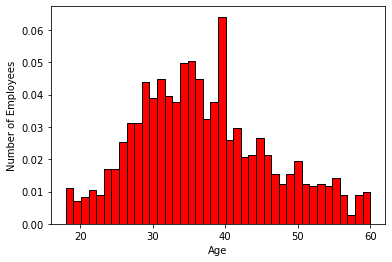

In [50]:
# histogram for age distribution
plt.hist(x=data['Age'],bins=40,color='r',edgecolor='black',density=True)
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

Text(0.5, 1.0, 'Education Field Counts')

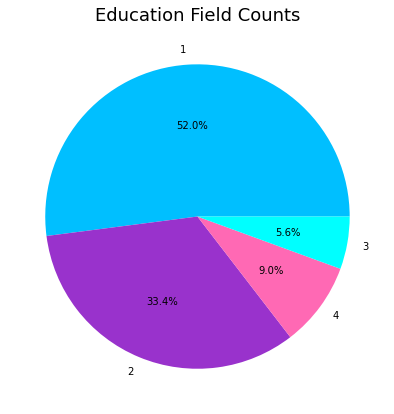

In [51]:
#Education FEield Distrbution
labels=data.EducationField.value_counts().index
sizes=data.EducationField.value_counts().values
#explode=[0,0.1,0,0,0.1,0.1]
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=["deepskyblue","darkorchid","hotpink","cyan","tomato","lime"],autopct="%1.1f%%")
plt.title("Education Field Counts",fontsize=18)

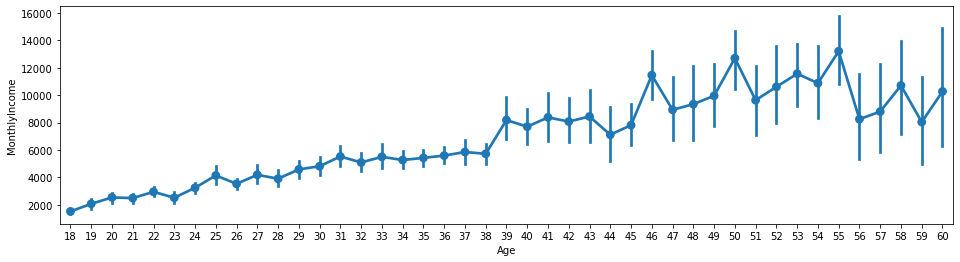

In [52]:
#The relationship between Monthly Income & Age
plt.figure(figsize=(16,4))
sns.pointplot(x="Age",y="MonthlyIncome",data=data)# average income
plt.show()

Conclusion:Wages will rise with age, but the gap will widen, so young people entering the workforce should try to choose high-potential positions with less focus on their payback.

## 3 Analysis of Attrition

### 3.1 Attrition Distribution

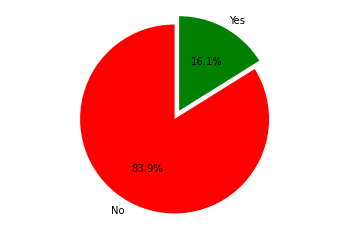

In [53]:
fig, ax = plt.subplots()
ax.pie(data["Attrition"].value_counts() ,labels=["No","Yes"],colors=['r','g'],
       autopct='%1.1f%%', explode=[0,0.1],shadow=False, startangle=90)
ax.axis('equal')
plt.show()

Conclusion: 16.1% employees quitted the organization when data were collected.

### 3.2 The Impact of Age on Attrition

In [54]:
#Relationship between Age & Attrition
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,5))
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Age Counts of People in an Organization')

<Figure size 576x360 with 0 Axes>

Conclusion: As can be seen, at a very young age, i.e. from 18-20, employees are much more likely to leave the organization because they are exploring positions that are right for them. The greatest attrition occurs between the ages of 28 and 33. As people continue to get older, the attrition rate drops because people are looking for stable jobs.

### 3.3 The Impact of Monthly Income on Attrition

In [55]:
#Relationship between Monthly Income & Attrition
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,5))
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income counts of People in an Organization')
fig.show()

<Figure size 576x360 with 0 Axes>

Conclusion: As can be seen, the attrition rate in the lower income group (monthly income<5k) is obviously high. Then the attrition rate drops with the increase of income. However, when monthy income goes from 9k -10k, there will be a small rise, which indicates that the middle class tends to pursue a better living standard, so they change a job. When the monthly income is substantial, the chances of an employee leaving the company are lower, almost a straight line to the X-axis.

### 3.4 The Impact of Environment Satisfaction on Attrition 

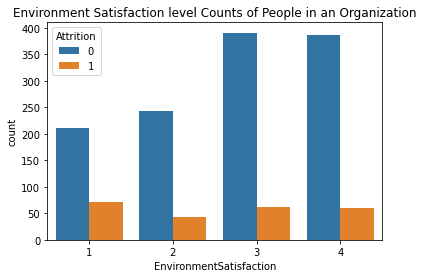

In [56]:
#Relationship between Environment Satisfaction & Attrition
sns.countplot(x='EnvironmentSatisfaction',data=data,hue='Attrition')
plt.title('Environment Satisfaction level Counts of People in an Organization')
plt.show()

Conclusion: On the satisfaction level 1-2, the likelihood of an employee leaving the organization decreases slightly. This suggests that people have higher organizational loyalty. However, when satisfaction goes from 2-3, people are more likely to leave their jobs in order to gain better opportunities and experience. For higher satisfaction, the attrition rate is almost constant.

### 3.5 The Impact of Job Satisfaction on Attrition

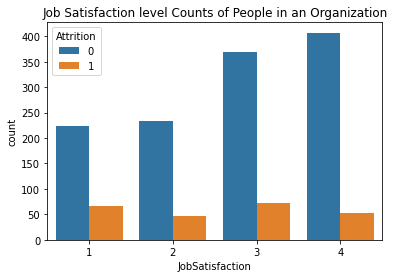

In [57]:
#Relationship between Job Satisfaction & Attrition
sns.countplot(x='JobSatisfaction',data=data,hue='Attrition')
plt.title('Job Satisfaction level Counts of People in an Organization')
plt.show()

Conclusion: When job satisfaction goes from 1-2, the attrition rate decreases with the improvement of job satisfaction. But on a scale of 2 to 3, people tend to look for better opportunities.

### 3.6 The Impact of Work Experience on Attrition

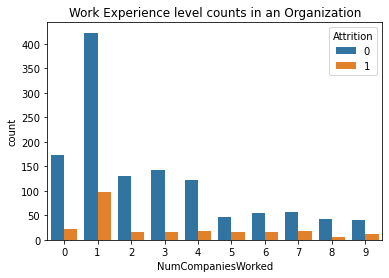

In [58]:
#Relationship between Environment Satisfaction & Attrition
sns.countplot(x='NumCompaniesWorked',data=data,hue='Attrition')
plt.title('Work Experience level counts in an Organization')
plt.show()

Conclusion: Employees at the beginning of their careers, or in the first few years of their careers, frequently change jobs. Employees with extensive experience at multiple companies tend to stay on.

### 3.7 The Impact of Stock Option Level on Attrition

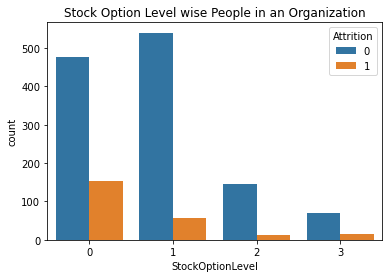

In [59]:
#Relationship between Stock Option Level & Attrition
sns.countplot(x='StockOptionLevel',data=data,hue='Attrition')
plt.title('Stock Option Level wise People in an Organization')
plt.show()

Conclusion: When stock options are limited, employees are more likely to leave the organization. And when stocks make up huge amounts of money, people don't want to lose that opportunity and stay put. Only those with limited or no stock options will leave the organization at any time.

### 3.8 The Impact of Job Role & Age on Attrintion

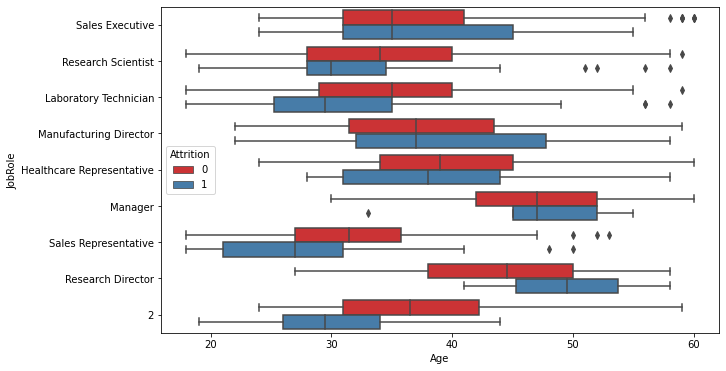

In [60]:
#Relationship between Job Role & Age & Attrition
plt.figure(figsize=(10,6)) 
jaa=data[['JobRole','Age','Attrition']]
ax = sns.boxplot(x="Age", y="JobRole", hue="Attrition",data=jaa,linewidth=1.5, palette="Set1",orient="h")
plt.show()

Conclusion: As can be seen, departing staff engaged in sales representatives or human resources work is relatively younger. However, most of the dimission personnel of managers and research directors are older, while separated employees of remaining departments are in the middle age. So it is recommended that companies pay more attention to younger employees in sales and human resources and older employees in management and research.

### 3.9 The Impact of Years in Current Role on Attrition

In [63]:
#The relationship between Years in Current Role & Attrition
yrscr_att=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

Conclusion: People are more likely to leave within a few years of starting work. When people stay in the same role for a long time, they tend to stay longer in order to get promoted.

### 3.10 The Impace of Percent Salary Hike on Attrition

In [64]:
#The Relationship Between Percent Salary Hike & Attrition
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

Conclusion: Higher pay encourages employees to work better and stay in the company. As a result, we see that employees are far more likely to leave companies with low pay rises than those with high ones.

## 4 Prediction- Considering all the inputs

### 4.1 Correlation of All Inputs

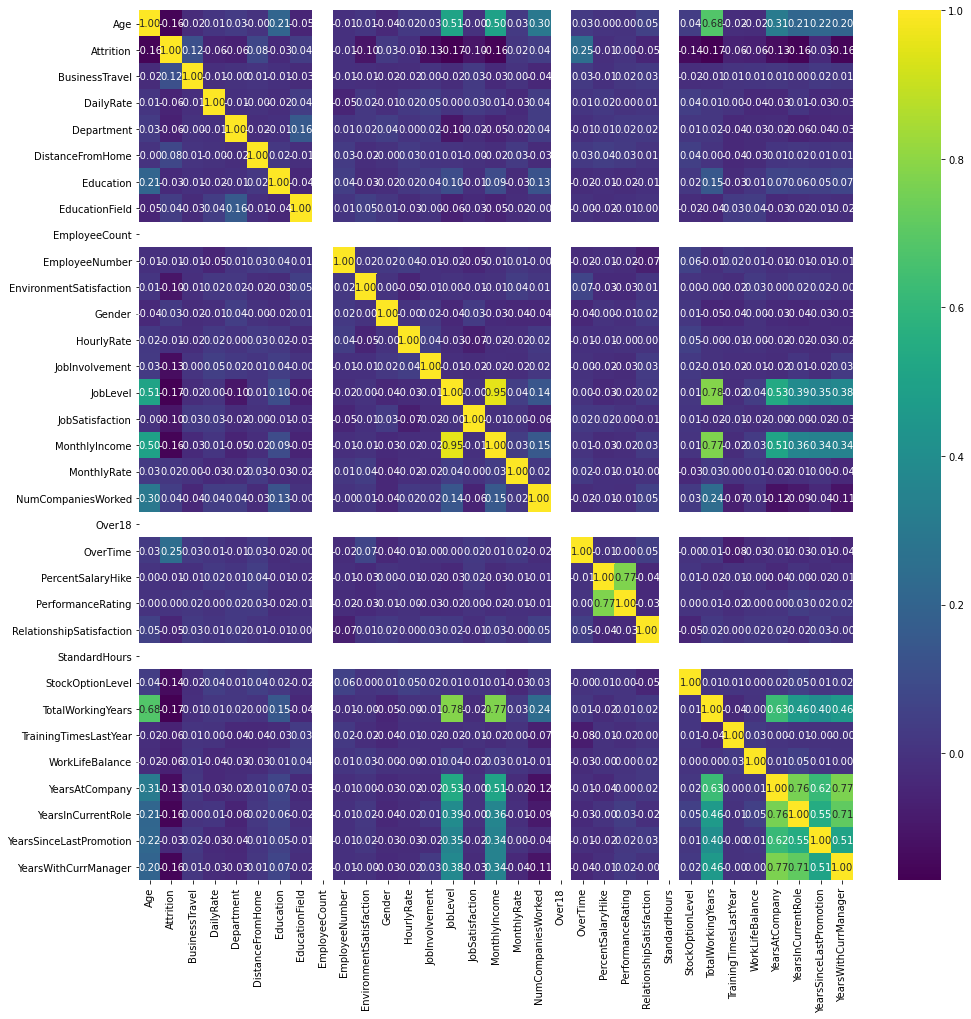

In [66]:
#Test Correlation of All Variables
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Attrition']]
# y=data[['Attrition']].values.ravel()
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')

Conclusion: As we can see the attrition has highest correlated value with DistanceFromHome, BusinessTravel, OverTime. Therefore, we need to do the train text split.

### 4.2 Predict Accuracy

In [68]:
#Given All Inputs to Predict Accuracy
data_dummies=pd.get_dummies(data)
features=data_dummies[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel','OverTime']]
X=features.values
y=data_dummies[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.877
Test Model accruracy scores: 0.880
--------------------------------------------------------------------------


Conclusion: Taking all inputs into account, There is 88% accuracy in predicting whether an employee will be staying in the organization or resigning from it.

In [69]:
#Given All Inputs to Predict Accuracy
data_dummies=pd.get_dummies(data)
features=data_dummies[['DistanceFromHome', 'BusinessTravel', 'OverTime']]
X=features.values
y=data_dummies[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.836
Test Model accruracy scores: 0.842
--------------------------------------------------------------------------


In [77]:
from statsmodels.formula.api import glm
attritionLogit = glm(formula='Attrition ~ DistanceFromHome+C(BusinessTravel)+C(OverTime)', data=data, family=sm.families.Binomial())
attritionLogitfit = attritionLogit.fit()
print(attritionLogitfit.summary())
attritionPredict = attritionLogitfit.predict(data)
cut_off = 0.5
modelprediction = np.where(attritionPredict > cut_off, 1, 0)
print(pd.crosstab(data.Attrition, modelprediction,rownames=['Actual'], colnames=['Predicted'],margins = True))


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -596.41
Date:                Tue, 15 Dec 2020   Deviance:                       1192.8
Time:                        13:45:03   Pearson chi2:                 1.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

Summary: The model is good looking at the confusion matrix since there are many values that are correctly predicted by this model. 

## 5 conclusion

Through the analysis of the data, the following conclusions can be drawn:

(1) People tend to move to different jobs at the beginning or early in their careers, and people with more work experience are less likely to leave.

(2) Salary and stock have a great incentive effect on employees. Higher salary and more stock options make more employees have higher organizational loyalty, and people are less likely to leave the organization.

(3) Departments that aim to achieve performance, such as sales, are more likely to leave the organization than those with a more managerial perspective, such as human resources.

(4) People who are satisfied with their jobs and the environment are loyal to the organization, and those who are less satisfied with their current situation are more likely to leave the organization.

(5) From the coeficient of this model, we can see that a person that traveling for business, far distance from home and working overtime could all cause attrition.

## 6 Reference

Boushey, H., & Glynn, S. J. (2012). There are significant business costs to replacing employees. Center for American Progress, 16, 1-9.
Frye, A., Boomhower, C., Smith, M., Vitovsky, L., & Fabricant, S. (2018). Employee Attrition: What Makes an Employee Quit?. SMU Data Science Review, 1(1), 9.

Latha, K. L. (2013). A study on employee attrition and retention in manufacturing industries. BVIMSR’s Journal of Management Research (BJMR), 5(1), 1-23.

Nappinnai, M. V., & Premavathy, N. (2013). Employee attrition and retention in a global competitive scenario. International Journal of Research in Business Management (IMPACT: IJRBM), 1(6), 11-14.